In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import os
from imp import reload
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D

import cranium

from sklearn.decomposition import PCA

import scipy.stats

In [2]:
wtdir = "C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\wt\\Output69semifinal"
yotdir = "C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\yot\\Output92semifinal"

wtdf = {}
for f in os.listdir(wtdir):
    if 'AT' in f:
        df = cranium.read_psi(os.path.join(wtdir,f))
        num = f.split('_')[1][:2]
        wtdf[num] = df
        
yotdf = {}
for f in os.listdir(yotdir):
    if 'AT' in f:
        yotdf[f.split('_')[1][:2]] = cranium.read_psi(os.path.join(yotdir,f))

In [3]:
y = wtdf['04'].theta

In [5]:
kde = scipy.stats.gaussian_kde(y)
kdepdf = kde.evaluate(x)

In [4]:
x = np.linspace(y.min(),y.max(),100)

<IPython.core.display.Javascript object>


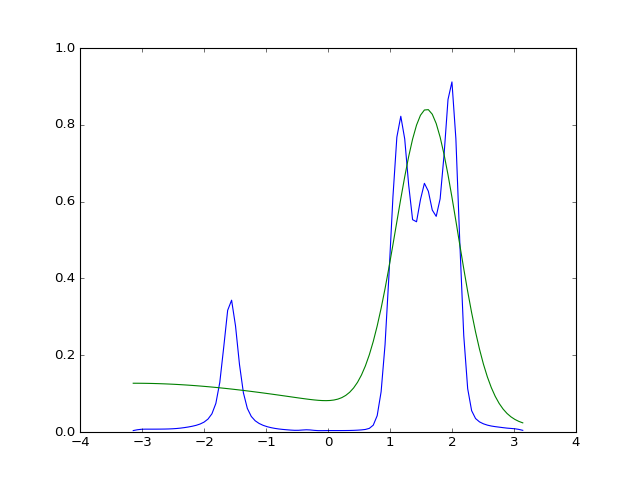

In [29]:
fig,ax = plt.subplots()
i = 3
params = wtparam[i]
ax.plot(wtkde[i][0],wtkde[i][1])
ax.plot(wtkde[i][0],bimodal(wtkde[i][0],params[0],params[1],params[2],params[3]))

In [28]:
wtparam

[array([-1.57118095,  0.23177795,  1.56682707,  0.3051431 ]),
 array([-3.14159265,  2.81560627,  1.6343262 ,  0.52239395]),
 array([-3.14159265,  3.14159265,  1.59321044,  0.5301527 ]),
 array([-3.14159265,  3.14159265,  1.59720131,  0.49876262]),
 array([-3.14159265,  3.03912915,  1.58124659,  0.61755621]),
 array([-3.14159262,  1.96701393,  1.54814138,  0.22747229]),
 array([-3.14159265,  3.14159265,  1.59151147,  0.53878772]),
 array([-3.14159265,  2.5125053 ,  1.56364425,  0.4528499 ]),
 array([-3.14159265,  3.14159265,  1.65299904,  0.55405085]),
 array([-3.14159265,  2.34847436,  1.52994644,  0.63744749]),
 array([-3.14159265,  3.14159265,  1.57694495,  0.49240524]),
 array([-3.14159265,  3.14159265,  1.51533282,  0.43535218]),
 array([-3.14159265,  3.14159265,  1.59647404,  0.59001204])]

In [23]:
wtkde = []
for num in wtdf.keys():
    df = (wtdf[num].theta)
    x = np.linspace(df.min(),df.max(),100)
    
    gkde = scipy.stats.gaussian_kde(df)
    kdepdf = gkde.evaluate(x)
    
    wtkde.append([x,kdepdf])

In [27]:
wtparam = []
for kde in wtkde:
    params,cov = curve_fit(bimodal,kde[0],kde[1],(-1.5,1,1.5,0.2),bounds=
                          (-np.pi,np.pi))
    wtparam.append(params)

In [7]:
def bimodal(x,m1,s1,m2,s2):
    norm = scipy.stats.norm
    return(norm.pdf(x,loc=m1,scale=s1) + norm.pdf(x,loc=m2,scale=s2))

In [12]:
from scipy.optimize import curve_fit

In [14]:
params,cov = curve_fit(bimodal,x,kdepdf,(-1.5,1,1.5,0.2))

In [15]:
params

array([-8.34953159,  3.28720267,  1.57118722,  0.53961745])

<IPython.core.display.Javascript object>


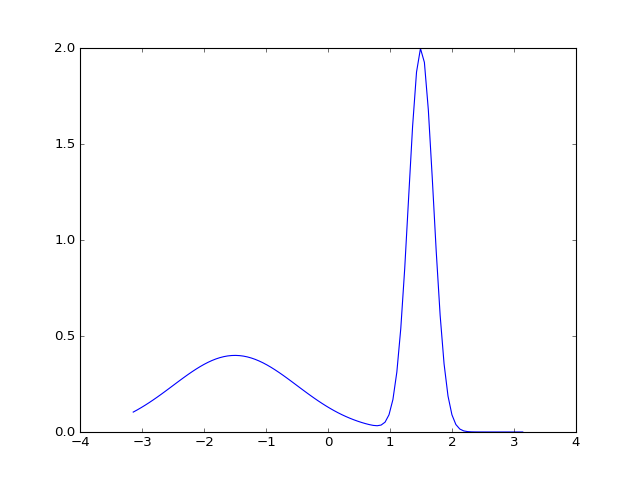

In [9]:
fig,ax = plt.subplots()

ax.plot(x,bimodal(x,-1.5,1,1.5,0.2))

# Grid fit

Data could be wrapped to accomodate grids that split at different points farther from 0

In [48]:
def fit_grid(y,divpoint,distname):
    
    left = y[y<divpoint]
    right = y[y>divpoint]
    
    if distname=='beta':
        lout = cranium.fit_beta(left)
        rout = cranium.fit_beta(right)
    elif distname=='gamma':
        lout = cranium.fit_gamma(left)
        rout = cranium.fit_gamma(right)
    elif distname=='halfnorm':
        lout = cranium.fit_halfnorm(left)
        rout = cranium.fit_halfnorm(right)
    
    x = np.linspace(y.min(),y.max(),y.size)
        
    gkde = scipy.stats.gaussian_kde(y)
    kde = gkde.evaluate(x)
    
    return([lout,rout],x,kde)

In [41]:
params,x,kde = fit_grid(wtdf['06'].theta.sample(frac=0.01),0,'beta')

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)
C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [46]:
params

[((259.85237271439644, -5.1328872366445566, 0.013693963980906693),
  0.25433288443132751,
  0.0),
 ((323.85773828101526, -2.5546601456648368, 0.012697551745620098),
  0.28435415211863635,
  0.0)]

In [51]:
reload(cranium)

<module 'cranium' from 'c:\\users\\zfishlab\\code\\craniumpy\\cranium\\__init__.py'>

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


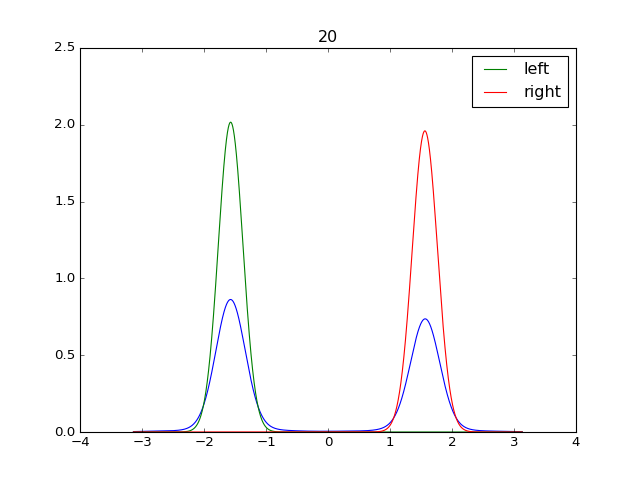

<IPython.core.display.Javascript object>


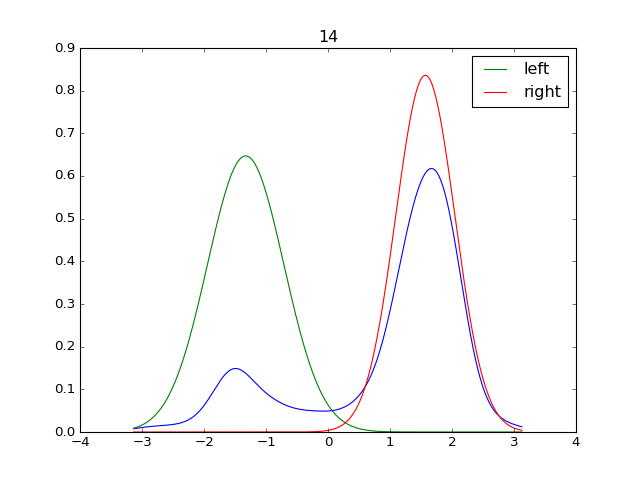

<IPython.core.display.Javascript object>


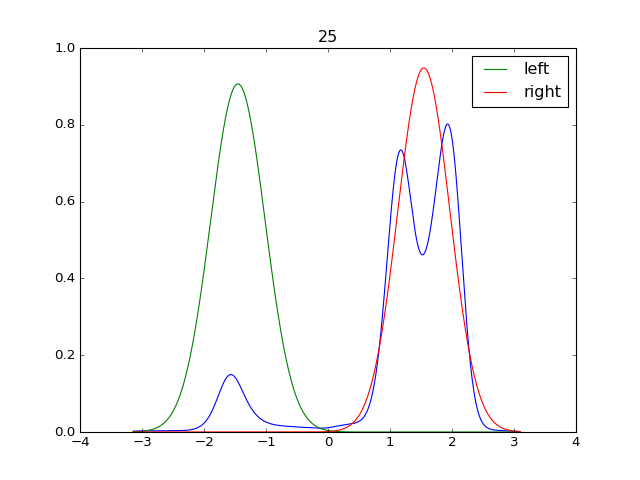

<IPython.core.display.Javascript object>


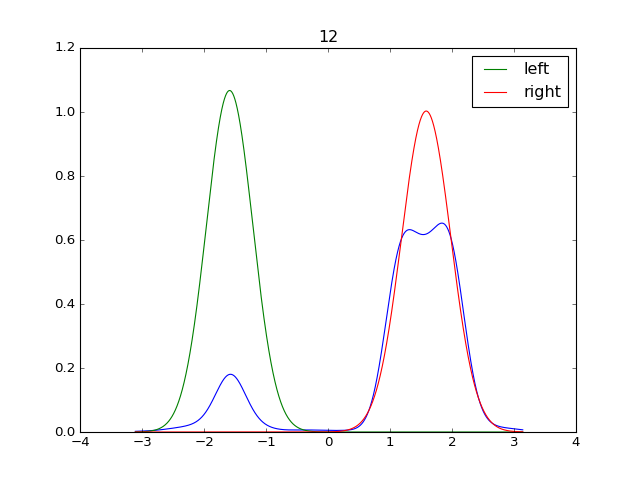

<IPython.core.display.Javascript object>


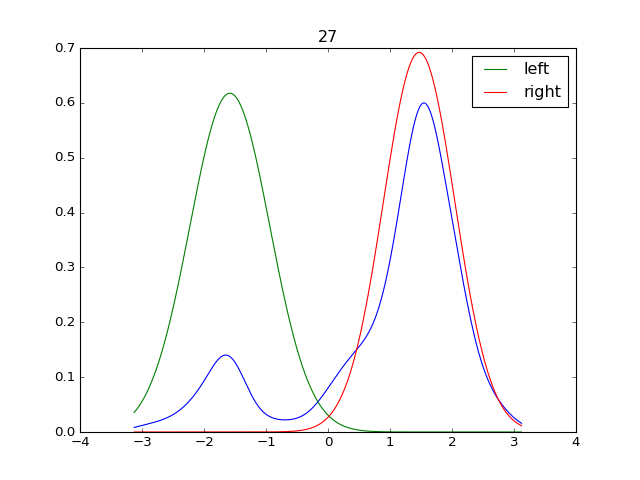

<IPython.core.display.Javascript object>


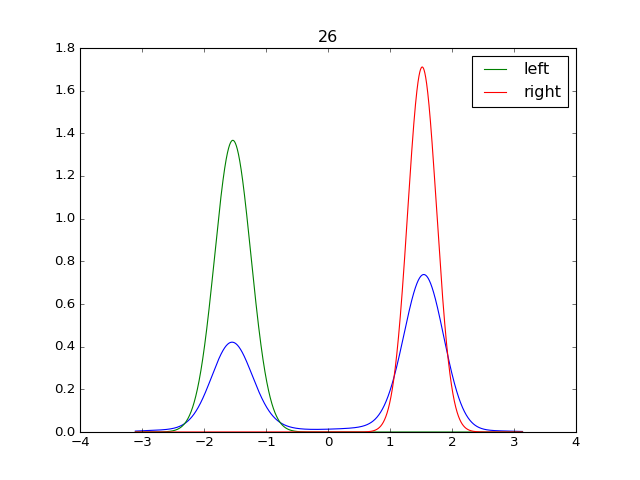

<IPython.core.display.Javascript object>


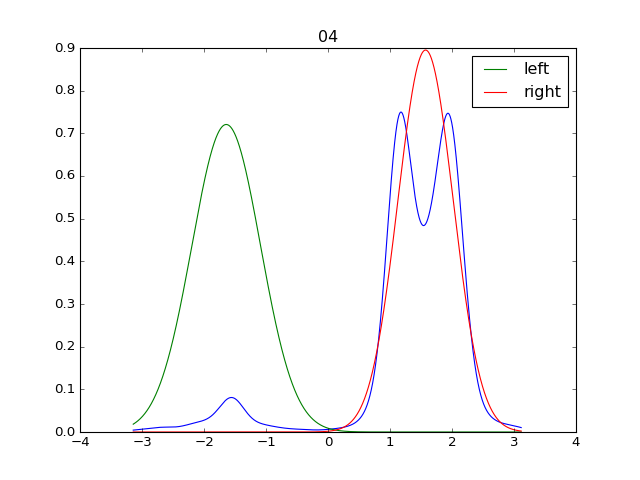

<IPython.core.display.Javascript object>


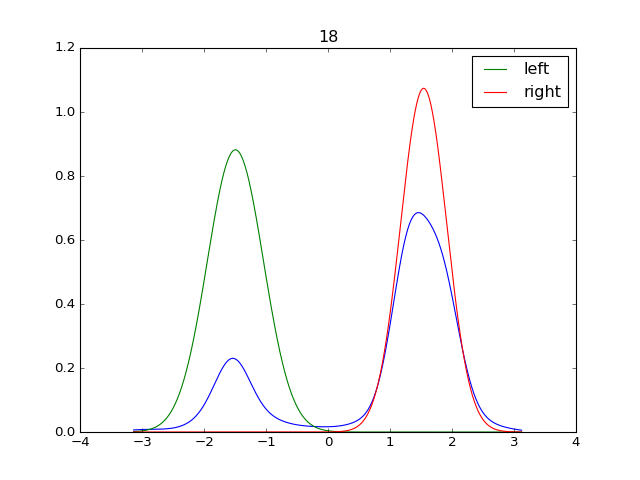

<IPython.core.display.Javascript object>


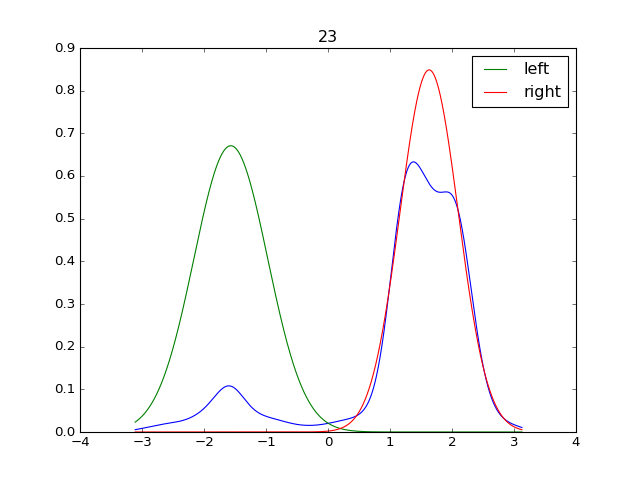

<IPython.core.display.Javascript object>


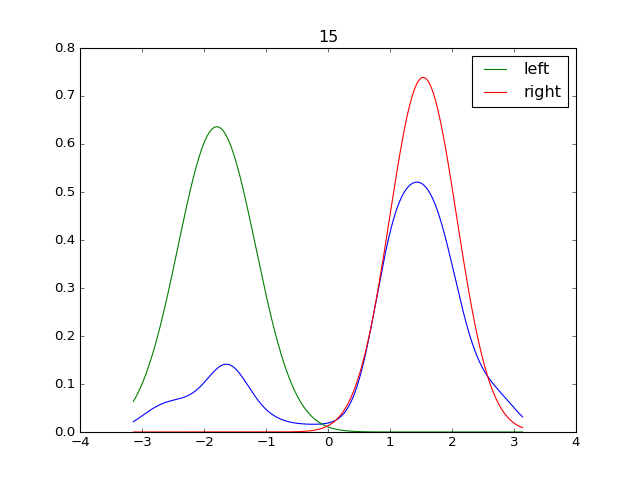

<IPython.core.display.Javascript object>


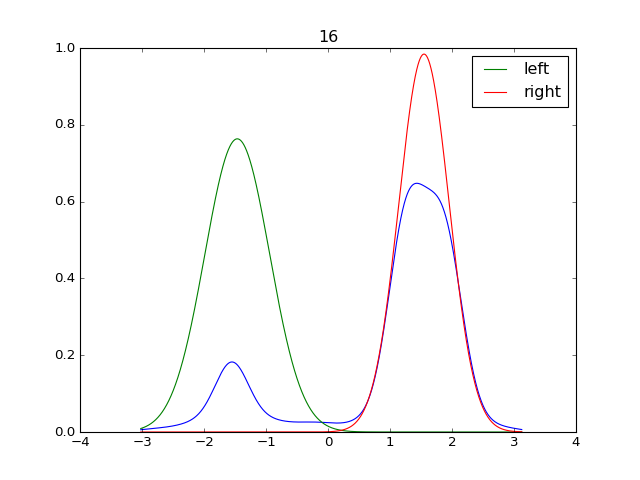

<IPython.core.display.Javascript object>


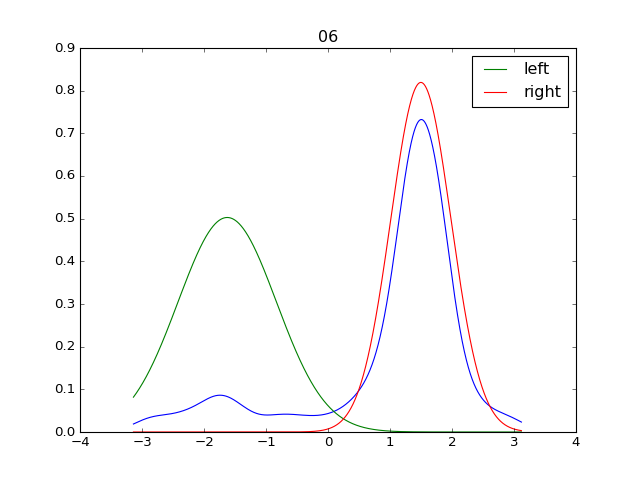

<IPython.core.display.Javascript object>


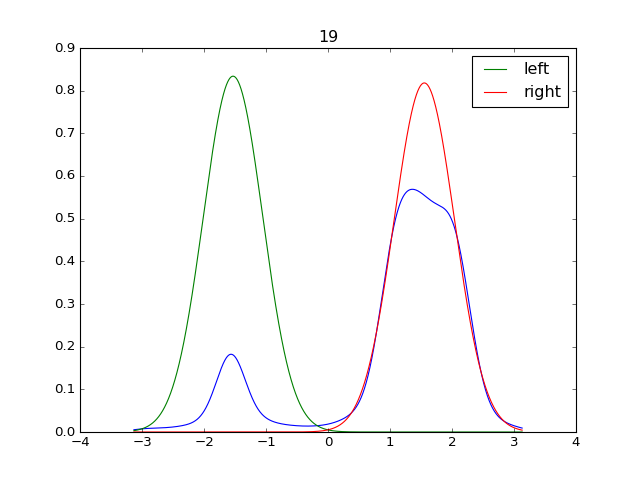

In [53]:
for num in wtdf.keys():
    y = wtdf[num].theta.sample(frac=0.01)
    
    params,x,kde = fit_grid(y,0,'halfnorm')
    
    pdfl = cranium.norm_pdf(x,params[0][0])
    pdfr = cranium.norm_pdf(x,params[1][0])
    
    fig,ax = plt.subplots()
    ax.plot(x,kde)
    ax.plot(x,pdfl,label='left')
    ax.plot(x,pdfr,label='right')
    ax.legend()
    
    ax.set_title(str(num))

<IPython.core.display.Javascript object>


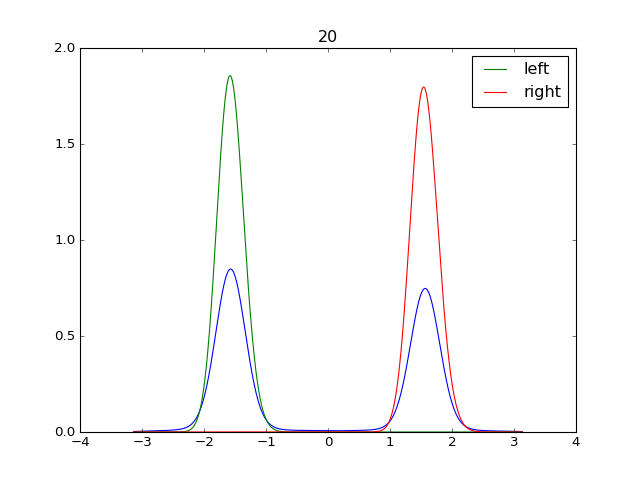

<IPython.core.display.Javascript object>


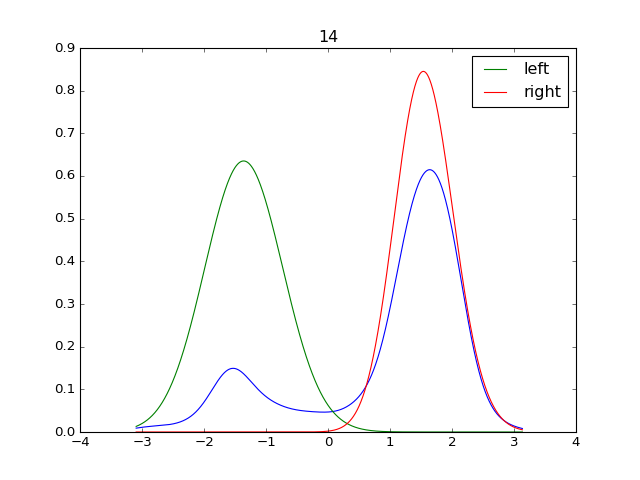

<IPython.core.display.Javascript object>


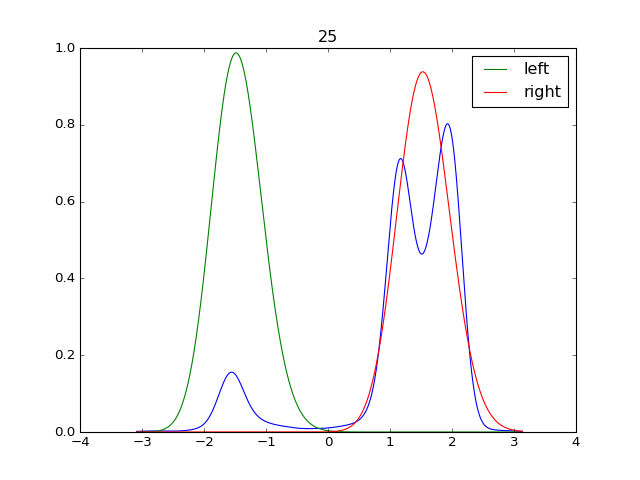

<IPython.core.display.Javascript object>


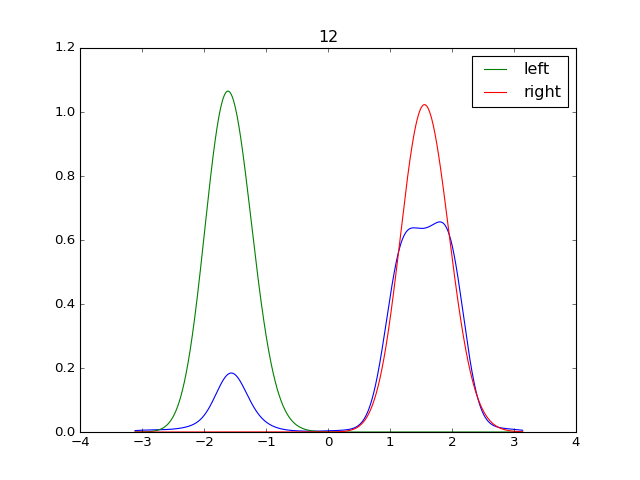

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


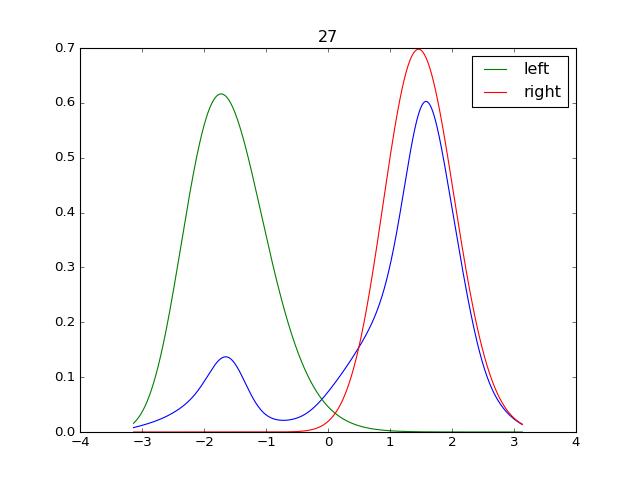

<IPython.core.display.Javascript object>


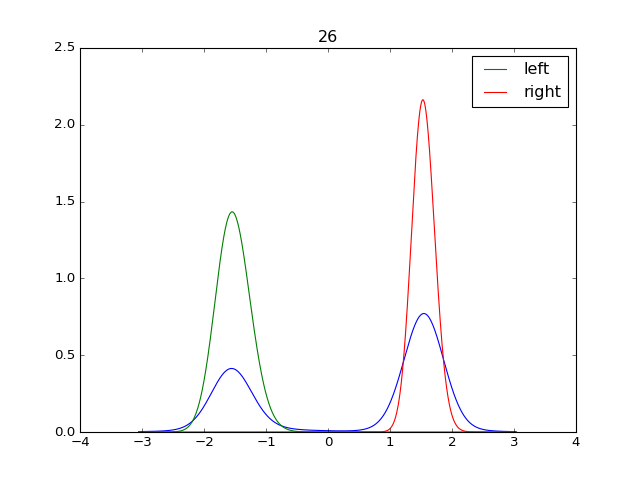

<IPython.core.display.Javascript object>


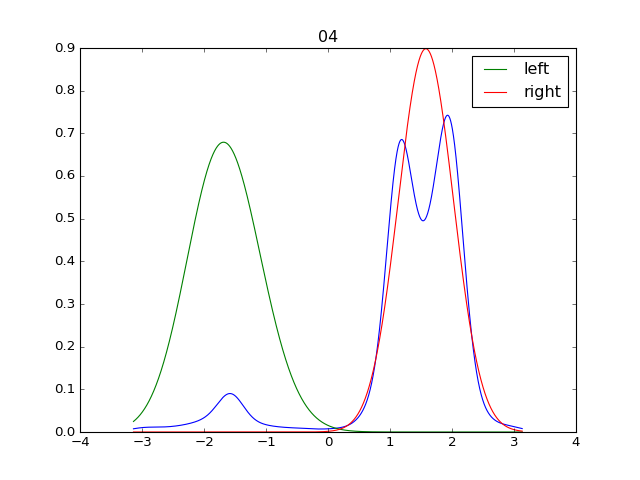

<IPython.core.display.Javascript object>


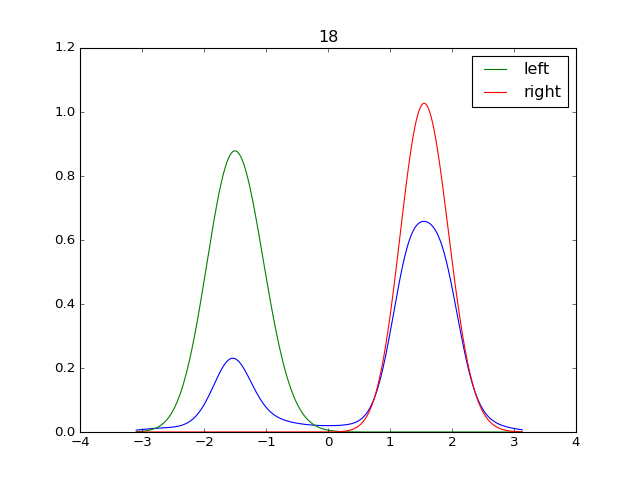

<IPython.core.display.Javascript object>


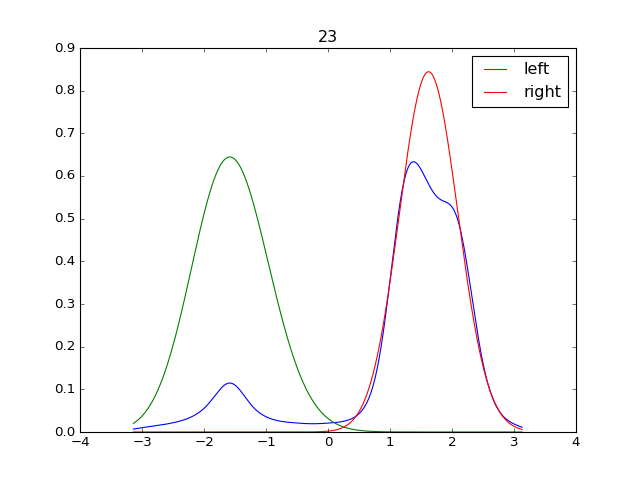

<IPython.core.display.Javascript object>


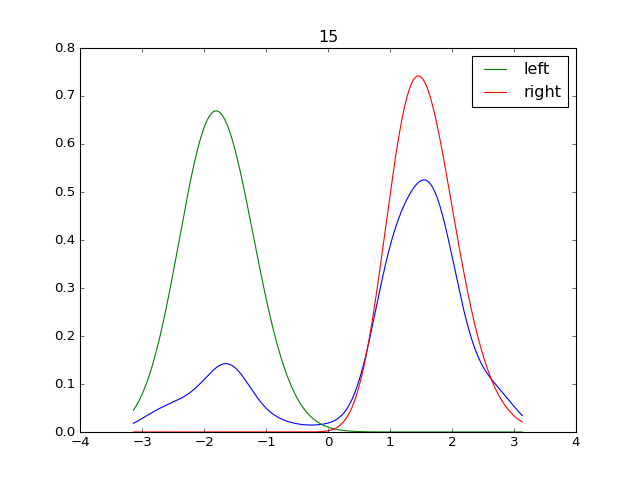

<IPython.core.display.Javascript object>


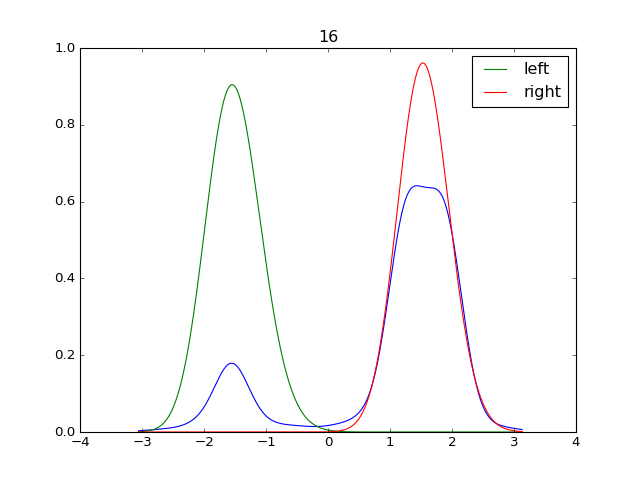

<IPython.core.display.Javascript object>


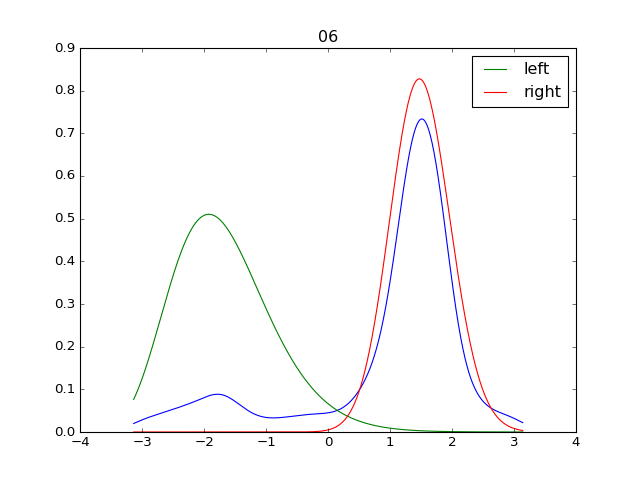

<IPython.core.display.Javascript object>


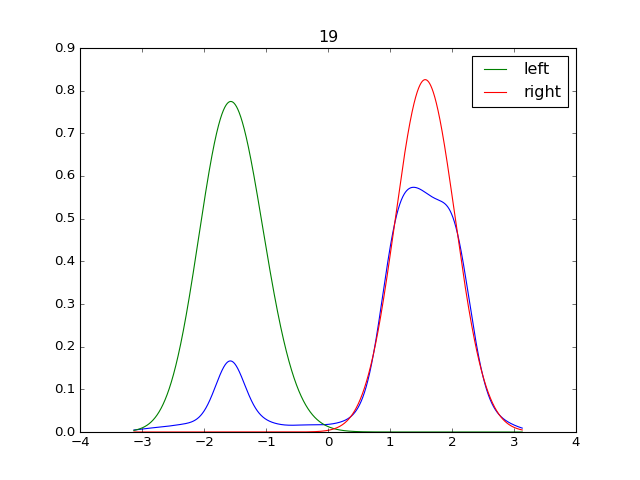

In [47]:
for num in wtdf.keys():
    y = wtdf[num].theta.sample(frac=0.01)
    
    params,x,kde = fit_grid(y,0,'gamma')
    
    pdfl = cranium.gamma_pdf(x,params[0][0])
    pdfr = cranium.gamma_pdf(x,params[1][0])
    
    fig,ax = plt.subplots()
    ax.plot(x,kde)
    ax.plot(x,pdfl,label='left')
    ax.plot(x,pdfr,label='right')
    ax.legend()
    
    ax.set_title(str(num))

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<IPython.core.display.Javascript object>


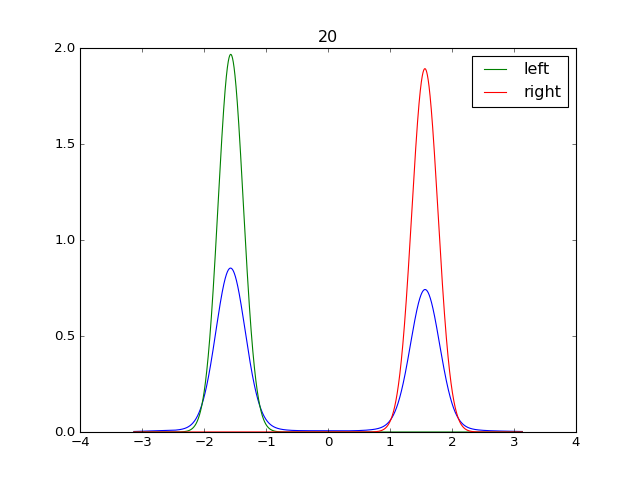

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)


<IPython.core.display.Javascript object>


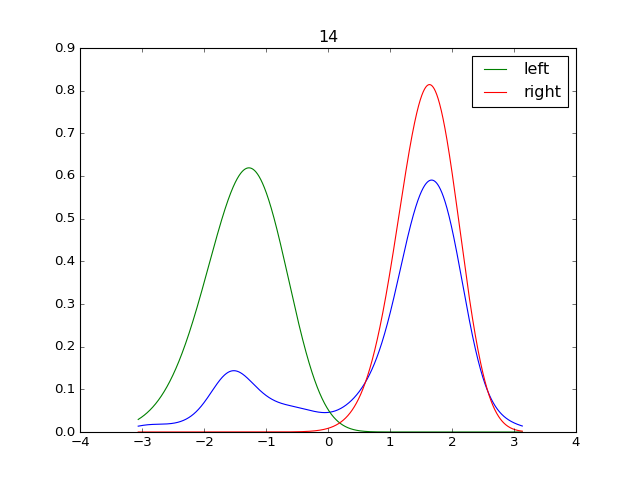

<IPython.core.display.Javascript object>


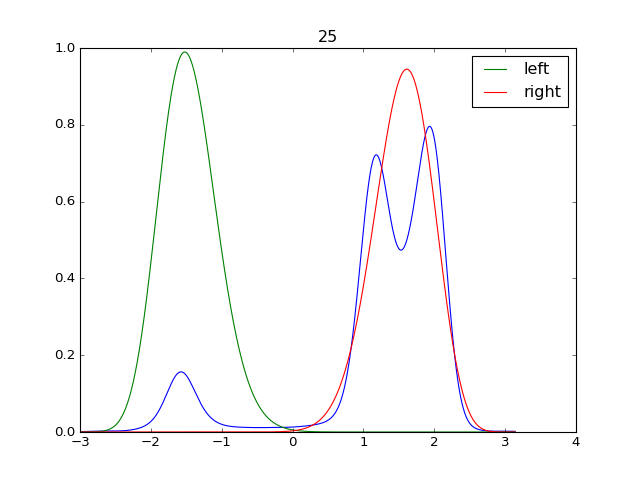

<IPython.core.display.Javascript object>


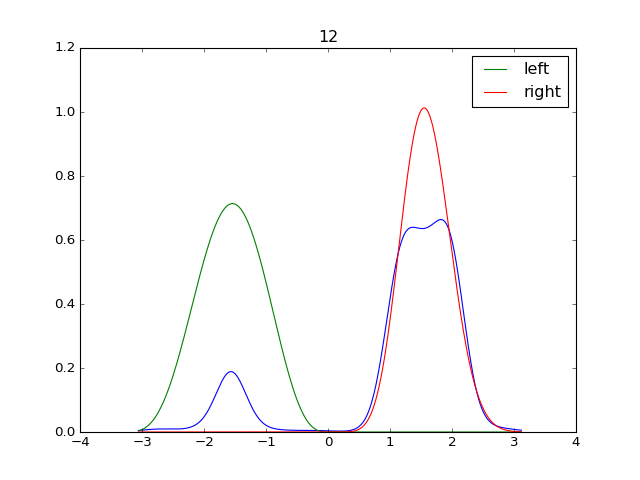

<IPython.core.display.Javascript object>


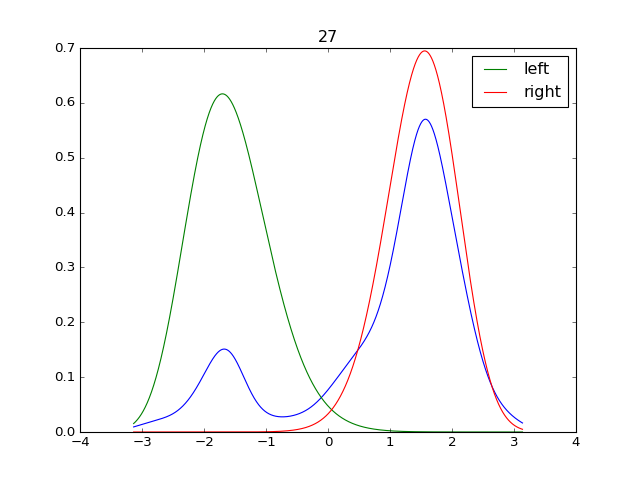

<IPython.core.display.Javascript object>


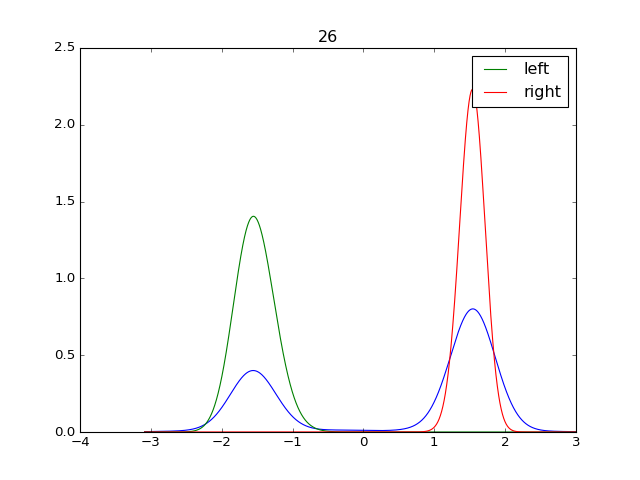

<IPython.core.display.Javascript object>


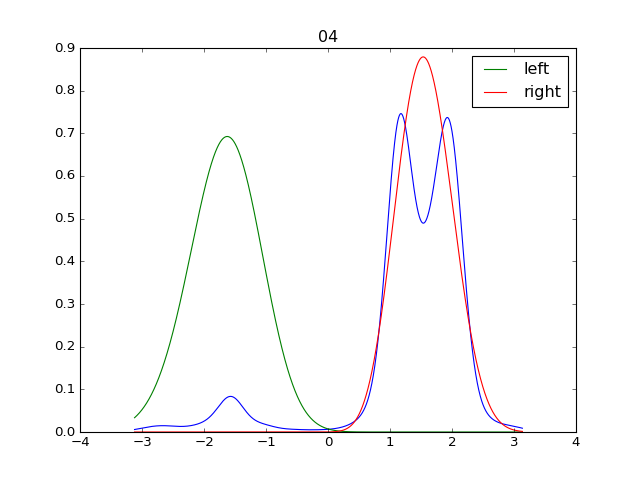

<IPython.core.display.Javascript object>


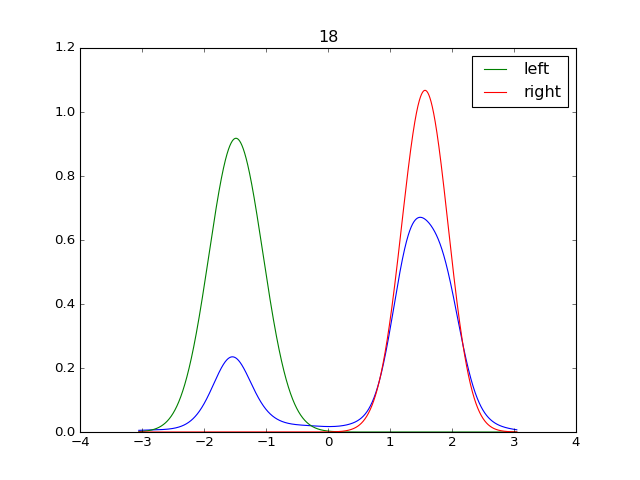

<IPython.core.display.Javascript object>


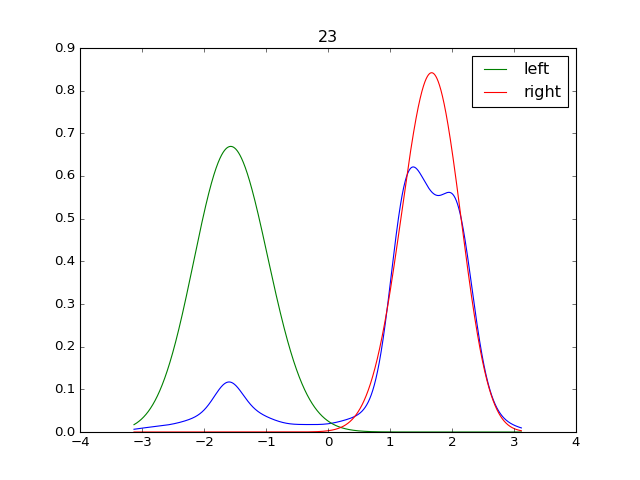

<IPython.core.display.Javascript object>


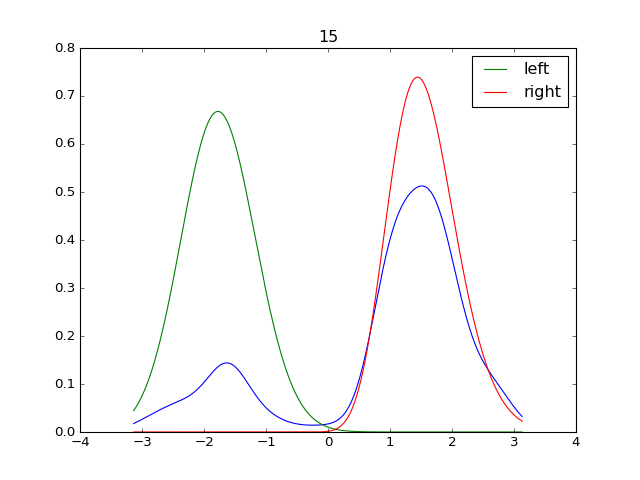

<IPython.core.display.Javascript object>


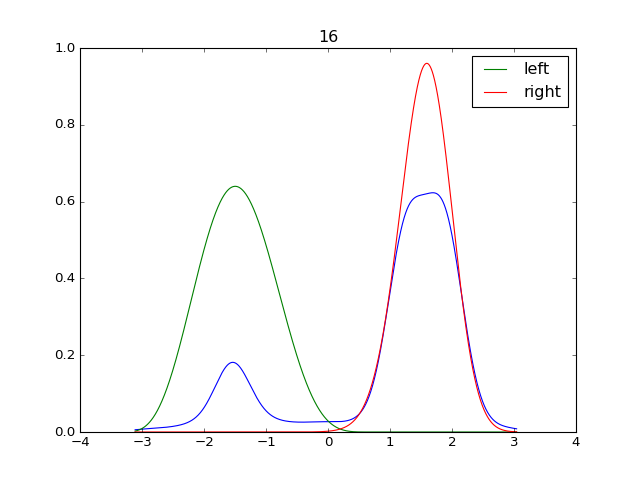

<IPython.core.display.Javascript object>


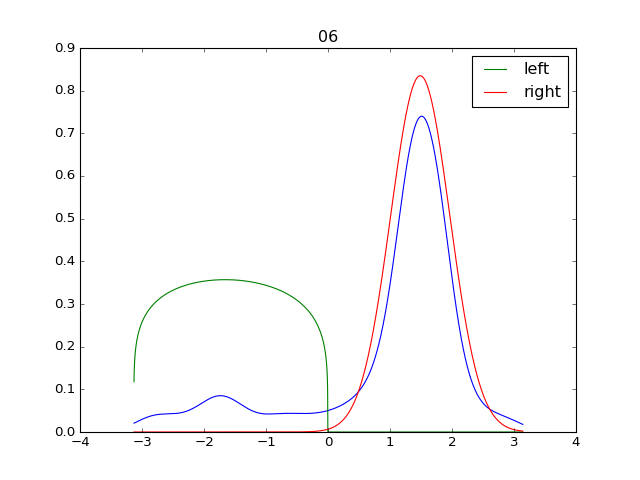

<IPython.core.display.Javascript object>


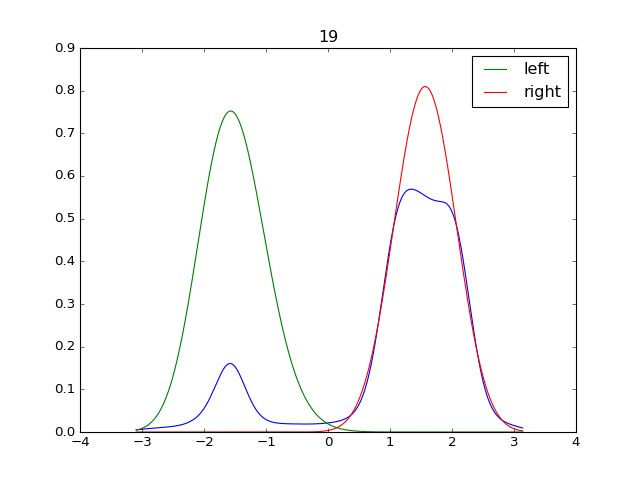

In [43]:
for num in wtdf.keys():
    y = wtdf[num].theta.sample(frac=0.01)
    
    params,x,kde = fit_grid(y,0,'beta')
    
    pdfl = cranium.beta_pdf(x,params[0][0])
    pdfr = cranium.beta_pdf(x,params[1][0])
    
    fig,ax = plt.subplots()
    ax.plot(x,kde)
    ax.plot(x,pdfl,label='left')
    ax.plot(x,pdfr,label='right')
    ax.legend()
    
    ax.set_title(str(num))

<IPython.core.display.Javascript object>


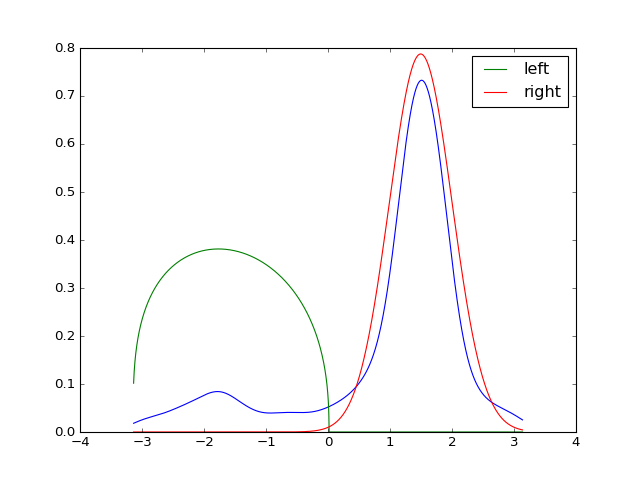

In [42]:
y = wtdf['06'].theta
xl = np.linspace(y.min(),0)
pdfl = cranium.beta_pdf(x,params[0][0])
xr = np.linspace(0,y.max())
pdfr = cranium.beta_pdf(x,params[1][0])

fig,ax = plt.subplots()

ax.plot(x,kde)
ax.plot(x,pdfl,label='left')
ax.plot(x,pdfr,label='right')
ax.legend()